### Exemplo Real: Carteira de Ativos

- Temos a carteira no arquivo "Carteira.xlsx" e queremos comparar essa carteira com o índice IBOV para saber se ela ganhou do índice

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance


carteira = pd.read_excel('Carteira.xlsx')
data_in = datetime.now() - timedelta(days=240)
data_fim = datetime.now()
ativos = list(carteira["Ativos"].astype(str)+".SA")
df = yfinance.download(ativos,data_in,data_fim)['Adj Close']
df


[*********************100%%**********************]  13 of 13 completed


Ticker,BBDC4.SA,BCRI11.SA,BOVA11.SA,BPAC11.SA,ENEV3.SA,ITUB4.SA,KNRI11.SA,MGLU3.SA,MOVI3.SA,NTCO3.SA,SMAL11.SA,VILG11.SA,XPLG11.SA
Date,,,,,,,,,,,,,
2023-12-22,16.138704,64.672577,128.940002,36.189087,13.65,31.639423,154.765213,19.828854,11.69,15.753449,112.900002,94.148117,101.903130
2023-12-26,16.186649,64.975304,129.649994,36.670956,13.58,31.962379,156.773651,19.735323,11.69,15.628652,113.480003,94.602982,102.377960
2023-12-27,16.282543,66.672386,130.229996,36.936474,13.60,32.180840,157.535172,21.044775,11.94,16.214245,114.000000,94.100739,103.394150
2023-12-28,16.388027,68.497902,130.389999,36.985641,13.61,32.266319,157.535172,20.202984,11.89,16.214245,113.199997,94.072311,103.422646
2024-01-02,16.061991,68.683304,128.759995,36.611950,13.29,31.855444,158.154572,19.174128,11.10,16.022247,109.910004,93.852943,104.101791
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,14.700000,67.320000,127.650002,35.060001,13.08,34.610001,154.850006,12.950000,7.58,16.379999,104.000000,88.449997,102.300003
2024-08-13,14.880000,67.279999,128.779999,35.599998,13.05,35.590000,154.300003,13.290000,7.40,14.930000,104.000000,88.360001,102.120003
2024-08-14,15.010000,67.400002,129.679993,35.000000,13.47,36.470001,154.830002,12.740000,7.37,14.750000,103.500000,88.650002,102.330002


#### Ajustando os dados

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 163 entries, 2023-12-22 to 2024-08-16
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   163 non-null    float64
 1   BCRI11.SA  163 non-null    float64
 2   BOVA11.SA  163 non-null    float64
 3   BPAC11.SA  163 non-null    float64
 4   ENEV3.SA   163 non-null    float64
 5   ITUB4.SA   163 non-null    float64
 6   KNRI11.SA  163 non-null    float64
 7   MGLU3.SA   163 non-null    float64
 8   MOVI3.SA   163 non-null    float64
 9   NTCO3.SA   163 non-null    float64
 10  SMAL11.SA  163 non-null    float64
 11  VILG11.SA  163 non-null    float64
 12  XPLG11.SA  163 non-null    float64
dtypes: float64(13)
memory usage: 17.8 KB


#### Para compararmos oscilações, precisamos normalizar

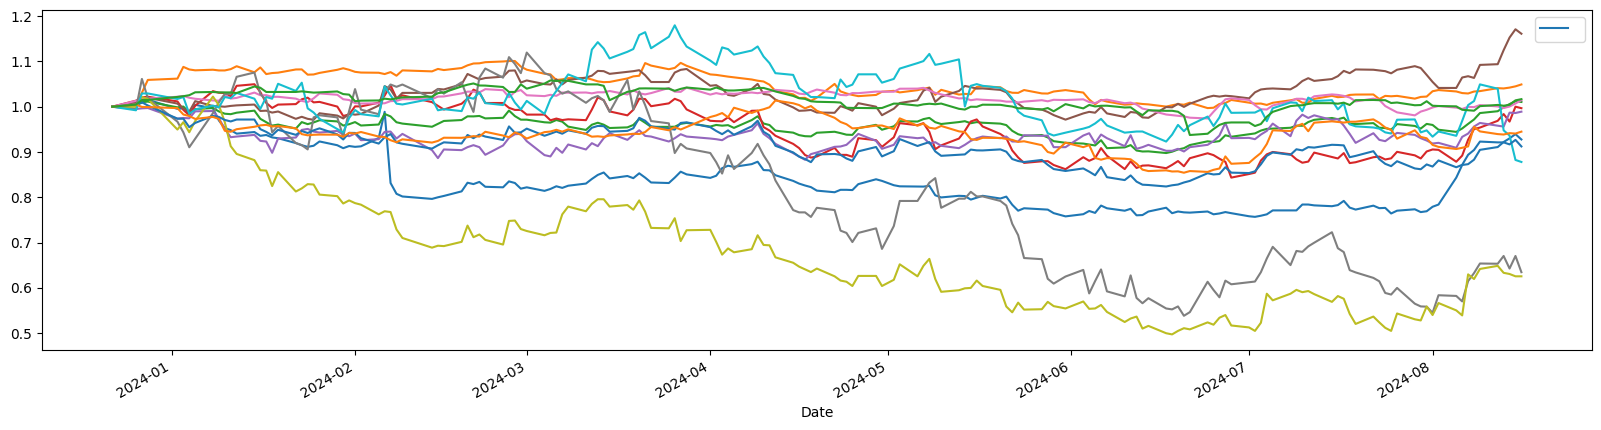

In [33]:
df_norm = df / df.iloc[0]

df_norm.plot(figsize=(20,5))
plt.legend([''])
plt.show()

#### Puxando o IBOV para comparar

In [34]:
df_ibov = yfinance.download(["^BVSP"],data_in,data_fim)['Adj Close']
df_ibov

[*********************100%%**********************]  1 of 1 completed


Date
2023-12-22    132753.0
2023-12-26    133533.0
2023-12-27    134194.0
2023-12-28    134185.0
2024-01-02    132697.0
                ...   
2024-08-12    131116.0
2024-08-13    132398.0
2024-08-14    133318.0
2024-08-15    134153.0
2024-08-16    133953.0
Name: Adj Close, Length: 163, dtype: float64

#### Vendo valores investidos

In [45]:
df_investido = pd.DataFrame()
for ativo in carteira["Ativos"]:
    acoes = carteira.loc[carteira['Ativos']==ativo,"Qtde"].values[0]
    df_investido[ativo] = acoes*df[f"{ativo}.SA"]
df_investido["Total"] = df_investido.sum(axis=1)

df_investido

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-12-22,12894.000244,11290.000153,1982.885361,1613.870430,9491.827011,1364.999962,1168.999958,3618.908691,1575.344944,6467.257690,9414.811707,15476.521301,10190.312958,86549.740410
2023-12-26,12964.999390,11348.000336,1973.532295,1618.664932,9588.713837,1357.999992,1168.999958,3667.095566,1562.865162,6497.530365,9460.298157,15677.365112,10237.796021,87123.861122
2023-12-27,13022.999573,11400.000000,2104.477501,1628.254318,9654.251862,1360.000038,1193.999958,3693.647385,1621.424484,6667.238617,9410.073853,15753.517151,10339.414978,87849.299717
2023-12-28,13038.999939,11319.999695,2020.298386,1638.802719,9679.895782,1360.999966,1189.000034,3698.564148,1621.424484,6849.790192,9407.231140,15753.517151,10342.264557,87920.788193
2024-01-02,12875.999451,10991.000366,1917.412758,1606.199074,9556.633186,1328.999996,1110.000038,3661.194992,1602.224731,6868.330383,9385.294342,15815.457153,10410.179138,87128.925610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,12765.000153,10400.000000,1294.999981,1469.999981,10383.000183,1307.999992,757.999992,3506.000137,1637.999916,6731.999969,8844.999695,15485.000610,10230.000305,84815.000916
2024-08-13,12877.999878,10400.000000,1328.999996,1488.000011,10677.000046,1305.000019,740.000010,3559.999847,1493.000031,6727.999878,8836.000061,15430.000305,10212.000275,85076.000357
2024-08-14,12967.999268,10350.000000,1273.999977,1501.000023,10941.000366,1347.000027,736.999989,3500.000000,1475.000000,6740.000153,8865.000153,15483.000183,10233.000183,85414.000320


#### Comparando carteira com o Índice

In [47]:
df_investido_norm = df_investido / df_investido.iloc[0]
df_investido_norm

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-12-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-12-26,1.005506,1.005137,0.995283,1.002971,1.010207,0.994872,1.000000,1.013315,0.992078,1.004681,1.004831,1.012977,1.004660,1.006633
2023-12-27,1.010005,1.009743,1.061321,1.008913,1.017112,0.996337,1.021386,1.020652,1.029250,1.030922,0.999497,1.017898,1.014632,1.015015
2023-12-28,1.011246,1.002657,1.018868,1.015449,1.019814,0.997070,1.017109,1.022011,1.029250,1.059149,0.999195,1.017898,1.014911,1.015841
2024-01-02,0.998604,0.973516,0.966981,0.995247,1.006828,0.973626,0.949530,1.011685,1.017063,1.062016,0.996865,1.021900,1.021576,1.006692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.989995,0.921169,0.653089,0.910854,1.093888,0.958242,0.648417,0.968800,1.039772,1.040936,0.939477,1.000548,1.003895,0.979957
2024-08-13,0.998759,0.921169,0.670235,0.922007,1.124862,0.956044,0.633020,0.983722,0.947729,1.040317,0.938521,0.996994,1.002128,0.982972
2024-08-14,1.005739,0.916740,0.642498,0.930062,1.152676,0.986813,0.630453,0.967142,0.936303,1.042173,0.941601,1.000419,1.004189,0.986878


In [46]:
df_ibov_norm = df_ibov / df_ibov.iloc[0]

df_ibov_norm

Date
2023-12-22    1.000000
2023-12-26    1.005876
2023-12-27    1.010855
2023-12-28    1.010787
2024-01-02    0.999578
                ...   
2024-08-12    0.987669
2024-08-13    0.997326
2024-08-14    1.004256
2024-08-15    1.010546
2024-08-16    1.009039
Name: Adj Close, Length: 163, dtype: float64

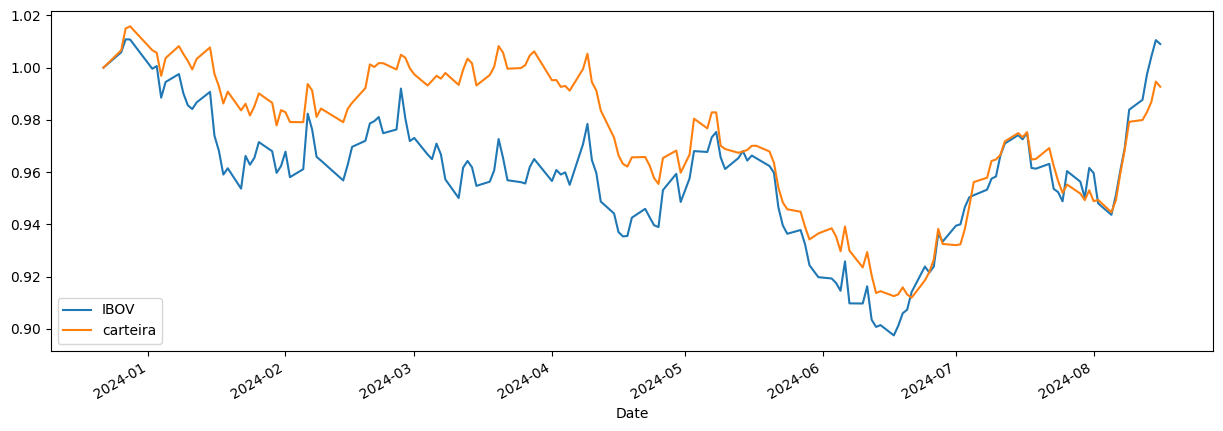

In [53]:
df_ibov_norm.plot(label="IBOV")
df_investido_norm["Total"].plot(label="carteira",figsize=(15,5))
plt.legend()
plt.show()

In [61]:
ret_ibov = df_ibov_norm[-1]-1
ret_cart = df_investido_norm["Total"][-1]-1

print(f'Retorno Ibov: {ret_ibov:.1%}')
print(f'Retorno carteira: {ret_cart:.1%}')


Retorno Ibov: 0.9%
Retorno carteira: -0.7%


C:\Users\kaio.siqueira\AppData\Local\Temp\ipykernel_27712\656169923.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret_ibov = df_ibov_norm[-1]-1
C:\Users\kaio.siqueira\AppData\Local\Temp\ipykernel_27712\656169923.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret_cart = df_investido_norm["Total"][-1]-1


#### Calculando retorno e correlação

In [62]:
print(df_investido["Total"].corr(df_ibov))

0.8479170398958042
